In [2]:
import matplotlib.pyplot as plt
from skimage import io,data,draw,color,transform,feature
import cv2
import numpy as np
%matplotlib inline 

#从摄像头拍摄一张图片
cap=cv2.VideoCapture(0)
while(1):    # get a frame   
    ret, frame = cap.read()    # show a frame   
    cv2.imshow("按Q拍摄图片", frame)   
    if cv2.waitKey(1) & 0xFF == ord('q'):   
        #保存一张图片
        cv2.imwrite('image.jpg', frame)
        break
cap.release()
cv2.destroyAllWindows()

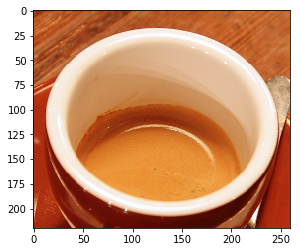

In [13]:
#读取图片
#image_rgb = io.imread('image.jpg')
image_rgb = data.coffee()[0:220, 160:420]
plt.imshow(image_rgb)

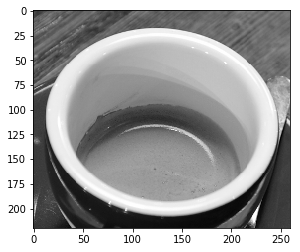

In [16]:
#转为灰度图
image_gray = color.rgb2gray(image_rgb)
plt.imshow(image_gray, cmap ='gray')#灰度图显示

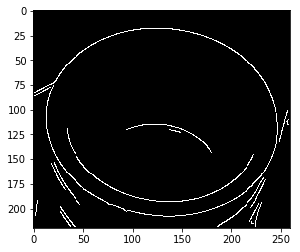

In [18]:
#canny算子检测边缘
edges = feature.canny(image_gray, sigma=1.0, low_threshold=0.55, high_threshold=0.8)
plt.imshow(edges, cmap='gray')

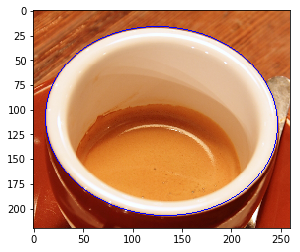

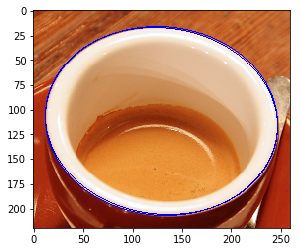

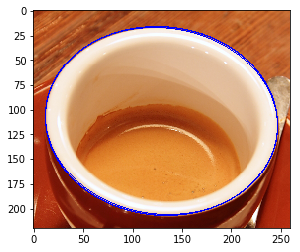

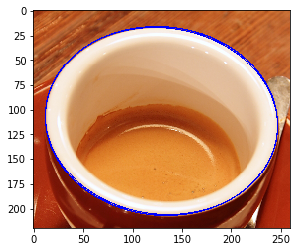

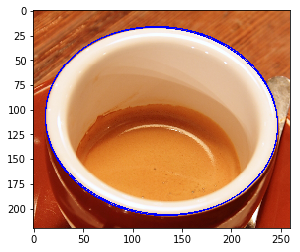

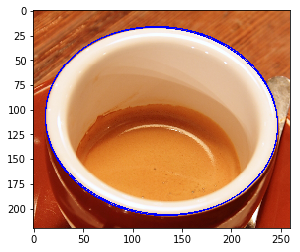

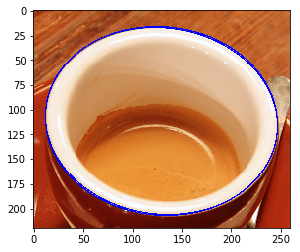

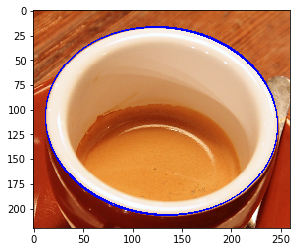

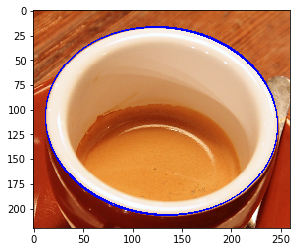

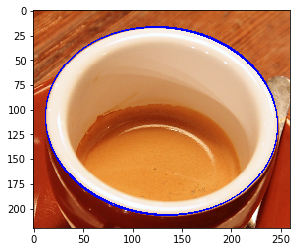

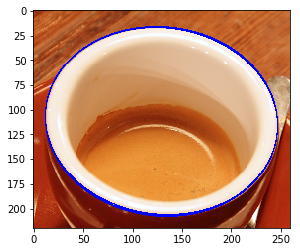

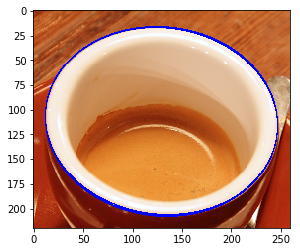

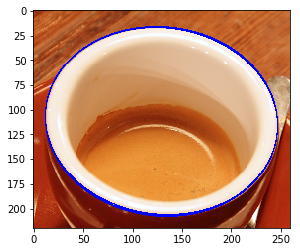

In [19]:
#霍夫变换找到椭圆
result =transform.hough_ellipse(edges, accuracy=20, threshold=250, min_size=100, max_size=120)
result.sort(order='accumulator')
best=list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]] 
orientation = best[5]
cy, cx =draw.ellipse_perimeter(yc, xc, a, b, orientation) 
image_rgb[cy, cx] = (0, 0, 255)
plt.imshow(image_rgb)
plt.show()

In [46]:
#假设已经找到了目标图像椭圆点，以及在图片中的像素位置，然后估计圆中心三维坐标点
best=list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]] 
orientation = best[5]
cy, cx = draw.ellipse_perimeter(yc, xc, a, b, orientation)
Y = cy[1::50]
X = cx[1::50]

In [32]:
#使用sympy求解非线性方程
# from scipy.optimize import fsolve
from sympy import *

In [53]:
[a, b, c, x, y, z, f] = symbols(['a', 'b', 'c', 'x', 'y', 'z', 'f'])

In [45]:
solve([x/y-1, x+y-4], [x, y])

{x: 2, y: 2}

In [54]:
#构建方程组
functions = []
R = 20
R_2 = R**2
for ii in range(7):
    px, py = X[ii], Y[ii]
    function = (x-px/(a*px+b*py+c*f))**2 + (y-py/(a*px+b*py+c*f))**2 + (z-1/(a*px/f+b*py/f+c))**2 - R_2
    functions.append(function)
#求解方程组
solve(functions, [a,b,c,x,y,z,f])

KeyboardInterrupt: 